# Analysis

## The scatter plot indicates a correlation between driver count and number of rides per city. Both categories are highest in urban areas.

## Drivers are significantly higher represented in urban areas, yet the average fare per driver is higher in rural areas. Drivers may make higher earning by working in rural areas.

## Suburban areas represent a moderate portion of total fares, total drivers, and total rides.

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "./city_data.csv"
ride_data_to_load = "./ride_data.csv"

# Read the City and Ride Data
cityfile = pd.read_csv(city_data_to_load)
ridefile = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
file = pd.merge(cityfile, ridefile, how = "outer", on = ["city", "city"])

# Display the data table for preview
file.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
urban = file[file["type"] == "Urban"]
suburban = file[file["type"] == "Suburban"]
rural = file[file["type"] == "Rural"]

urbcitymeans = urban.groupby(["city"]).mean()
urbcitytotals = urban.groupby(["city"]).sum()
urbcitycounts = urban.groupby(["city"]).count()

subcitymeans = suburban.groupby(["city"]).mean()
subcitytotals = suburban.groupby(["city"]).sum()
subcitycounts = suburban.groupby(["city"]).count()

rurcitymeans = rural.groupby(["city"]).mean()
rurcitytotals = rural.groupby(["city"]).sum()
rurcitycounts = rural.groupby(["city"]).count()

citytypes = file["type"].unique()


## Bubble Plot of Ride Sharing Data

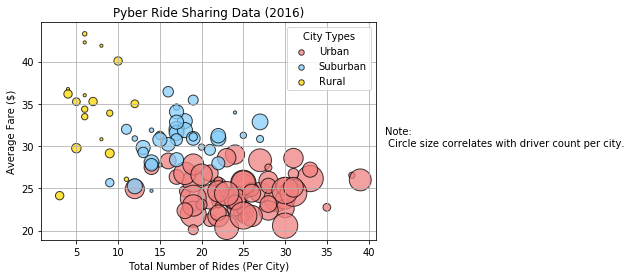

In [4]:
# Obtain the x(total rides) and y(avg fare) coordinates for each of the three city types
urb_xaxis = urbcitycounts["ride_id"]
urb_yaxis = urbcitymeans["fare"]
urb_size = urbcitymeans["driver_count"]
sub_xaxis = subcitycounts["ride_id"]
sub_yaxis = subcitymeans["fare"]
sub_size = subcitymeans["driver_count"]
rur_xaxis = rurcitycounts["ride_id"]
rur_yaxis = rurcitymeans["fare"]
rur_size = rurcitymeans["driver_count"]

# Build the scatter plots for each city types
plt.scatter(urb_xaxis, urb_yaxis, s = urb_size*10, marker="o", facecolors="LightCoral", edgecolors="black", alpha = .75)
plt.scatter(sub_xaxis, sub_yaxis, s = sub_size*10, marker="o", facecolors="LightSkyBlue", edgecolors="black", alpha = .75)
plt.scatter(rur_xaxis, rur_yaxis, s = rur_size*10, marker="o", facecolors="Gold", edgecolors="black", alpha = .75)

# Incorporate the other graph properties
plt.grid(b=True, which='major', axis='both')
x_label = plt.xlabel("Total Number of Rides (Per City)")
y_label = plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
lgnd = plt.legend(citytypes, title = "City Types", scatterpoints=1)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 30, "Note:\n Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("./pyberbubble.png")

## Total Fares by City Type

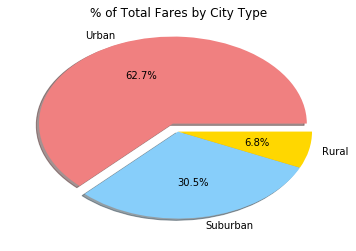

In [5]:
# Calculate Type Percents
urbfares = urbcitytotals["fare"].sum()
subfares = subcitytotals["fare"].sum()
rurfares = rurcitytotals["fare"].sum()
totalfares = urbfares + subfares + rurfares

urbfaresper = urbfares / totalfares * 100
subfaresper = subfares / totalfares * 100
rurfaresper = rurfares / totalfares * 100

farepercents = [urbfaresper, subfaresper, rurfaresper]
colors = ["LightCoral", "LightSkyBlue", "Gold"]
explode = (0.1,0,0) 

# Build Pie Chart
plt.pie(farepercents, labels = citytypes, colors = colors, shadow = True, autopct="%1.1f%%", explode = explode)
plt.axis = "equal"
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("./pyberfares.png")

## Total Rides by City Type

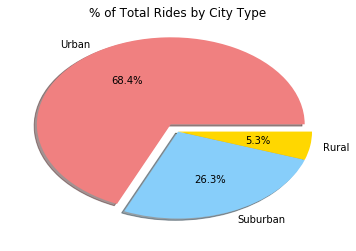

In [6]:
# Calculate Ride Percents
urbrides = urbcitycounts["ride_id"].sum()
subrides = subcitycounts["ride_id"].sum()
rurrides = rurcitycounts["ride_id"].sum()
totalrides = urbrides + subrides + rurrides

urbridesper = urbrides / totalrides * 100
subridesper = subrides / totalrides * 100
rurridesper = rurrides / totalrides * 100

ridepercents = [urbridesper, subridesper, rurridesper]
colors = ["LightCoral", "LightSkyBlue", "Gold"]
explode = (0.1,0,0) 

# Build Pie Chart
plt.pie(ridepercents, labels = citytypes, colors = colors, shadow = True, autopct="%1.1f%%", explode = explode)
plt.axis = "equal"
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("./pyberrides.png")

## Total Drivers by City Type

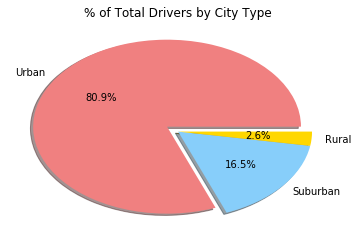

In [7]:
# Calculate Driver Percents
urbdrivers = urbcitymeans["driver_count"].sum()
subdrivers = subcitymeans["driver_count"].sum()
rurdrivers = rurcitymeans["driver_count"].sum()
totaldrivers = urbdrivers + subdrivers + rurdrivers

urbdriversper = urbdrivers / totaldrivers * 100
subdriversper = subdrivers / totaldrivers * 100
rurdriversper = rurdrivers / totaldrivers * 100

driverspercents = [urbdriversper, subdriversper, rurdriversper]
colors = ["LightCoral", "LightSkyBlue", "Gold"]
explode = (0.1,0,0) 

# Build Pie Chart
plt.pie(driverspercents, labels = citytypes, colors = colors, shadow = True, autopct="%1.1f%%", explode = explode)
plt.axis = "equal"
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("./pyberdrivers.png")

In [26]:
urbfpd = urbfares / urbdrivers
subfpd = subfares / subdrivers
rurfpd = rurfares / rurdrivers

faresperdriver = [urbfpd, subfpd, rurfpd]



Text(0,0.5,'Fares Per Driver ($)')

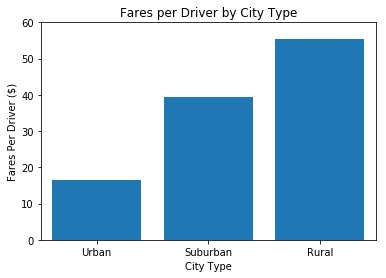

In [30]:
x_axis = np.arange(0, len(faresperdriver))
plt.bar(x_axis, faresperdriver, align = "center")
plt.xticks(x_axis, ["Urban", "Suburban", "Rural"])
plt.xlim(-.5, len(x_axis) - .5)
plt.ylim(0, 60)
plt.title("Fares per Driver by City Type")
plt.xlabel("City Type")
plt.ylabel("Fares Per Driver ($)")

In [29]:
print(f"The average fare per driver in urban areas is ${urbfpd:.2f}.")
print(f"The average fare per driver in suburban areas is ${subfpd:.2f}.")
print(f"The average fare per driver in rural areas is ${rurfpd:.2f}.")

The average fare per driver in urban areas is $16.57.
The average fare per driver in suburban areas is $39.50.
The average fare per driver in rural areas is $55.49.
